<img src="idal-logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Máster IA3</h1></font>
<font color="#37A61F"><h2 align="left">Aprendizaje Máquina y Programación Orientada a Objetos (ML y OOP)</h2></font>

<font color="#15A3CA"><h2 align="left">Javier Yago Córcoles</h2></font>
<font color="#15A3CA"><h4 align="left">Data Scientist</h4></font>

In [ ]:
# IMPORTACION DE LAS LIBRERIAS NECESARIAS

import numpy as np
import pandas as pd
from itertools import cycle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from pprint import pprint
from time import time
import joblib
import os

from matplotlib import pyplot as plt

En este notebook se presenta una Pipeline de procesamiento de datos, entrenamiento de modelos, inferencia y presentación de los resultados, centralizando todos los procesos en una misma clase.

Para la práctica de este ejercicio, se ha tomado como conjunto de datos un dataset que contiene 129.880 muestras de clientes de compañías de vuelo a los que se les ha preguntado si están satisfechos o no con el vuelo que han tomado. Es un dataset extraído de Kaggle, ([aquí](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) el link), que contiene 25 variables con diferentes valores de los vuelos que han tomado los clientes a los que se ha encuestado.


## Clase `Pipeline` **EXPLICACIÓN**

### Método privado `__preprocess`

**¡OJO!** Esta y otra función que se menciona más adelante son las __únicas funciones__ de la clase `Pipeline` que están completamente personalizadas para el dataset utilizado, en caso de utilizar otro dataset diferente, conviene realizar un análisis exploratorio de los datos para observar las posibles acciones que se debería llevar a cabo para acondicionar el dataset de cara al entrenamiento del modelo y modificar dichas funciones. **El resto de métodos implementados en la clase `Pipeline` se pueden utilizar de manera genérica para cualquier otro caso de uso sin necesidad de aplicar ninguna modificación.**

Para el dataset utilizado en este ejercicio, estos son los procesos que se han llevado a cabo:

- Se establece la columna `satisfaction` como variable objetivo a predecir.
- Se eliminan las observaciones con valores faltantes para evitar conflictos y errores.
- Se reduce el tamaño del dataset, escogiendo de manera aleatoria la mitad de las muestras, ya que trabajar con un conjunto de casi 130.000 muestras puede conllevar tiempos muy largos de entrenamiento (especialmente para el método que se va a seguir en este ejercicio), por lo que, con la mitad de muestras nos sirve para llevar a cabo este caso de uso.
- Se seleccionan los conjuntos `X` e `y`.
- Se eliminan las columnas de los índices y los id's de los pasajeros, ya que son columnas sin ningún valor añadido que pueden entorpecer en el entrenamiento del modelo.
- Se discretizan las variables categóricas a formato numérico, para que el modelo sea capaz de procesarlas:

<table>
<tr>
<th>Variable</th>
<th>Valor</th>
<th>Código</th>
</tr>
<tr bgcolor="#CF3A37">
<td rowspan="2">Gender</td>
<td>Male</td>
<td>0</td>
</tr>
<tr bgcolor="#CF3A37">
<td>Female</td>
<td>1</td>
</tr>
<tr bgcolor="#3A7927">
<td rowspan="2">Customer Type</td>
<td>Loyal Customer</td>
<td>0</td>
</tr>
<tr bgcolor="#3A7927">
<td>disloyal Customer</td>
<td>1</td>
</tr>
<tr bgcolor="#288986">
<td rowspan="2">Type of Travel</td>
<td>Personal Travel</td>
<td>0</td>
</tr>
<tr bgcolor="#288986">
<td>Business travel</td>
<td>1</td>
</tr>
<tr bgcolor="#7D36CC">
<td rowspan="3">Class</td>
<td>Eco Plus</td>
<td>0</td>
</tr>
<tr bgcolor="#7D36CC">
<td>Business</td>
<td>1</td>
</tr>
<tr bgcolor="#7D36CC">
<td>Eco</td>
<td>2</td>
</tr>
<tr bgcolor="#CB0000">
<td rowspan="2">satisfaction</td>
<td>neutral or dissatisfied</td>
<td>0</td>
</tr>
<tr bgcolor="#CB0000">
<td>satisfied</td>
<td>1</td>
</tr>
</table>

- Se hace la división en train y test.
- Se define el scaler pasado como argumento (a elección del usuario).

### Métodos `__train_scaler`, `scaler_transform` y `save_scaler`:

Estos métodos sirven para entrenar el modelo de estandarización de los datos (solamente con el conjunto de entrenamiento), y, posteriormente, aplicar la transformación con el modelo obtenido en ambos conjuntos (entrenamiento y test).

Además, el método `save_scaler` sirve para almacenar el modelo que se ha entrenado para escalar los datos, por si se necesita usar posteriormente para hacer el preprocesamiento correspondiente de los datos para poder inferir con el modelo predictivo.

### Métodos `reduccion_dim`, `__train_reduccion`, `reduccion_transform`, `summary_reduccion` y `save_reduccion`:

- En el primero, se establece el método de reducción de dimensionalidad que se va a utilizar.
- En el segundo, se entrena el modelo escogido, solamente con el conjunto de entrenamiento.
- En el tercero, se aplica la reducción de la dimensionalidad tanto a train como test.
- En el cuarto, se muestra por pantalla un gráfico donde se observa el ratio de varianza explicada por cada componente.
- En el último método se almacena el modelo de reducción de la dimensionalidad entrenado, para, posteriormente, preprocesar los datos si fuera necesario en caso de querer realizar la inferencia con el modelo entrenado.

### Método `preparacion_datos`:

En este método se da como entrada todos los parámetros necesarios para las funciones mencionadas hasta ahora, y se aplica toda la pipeline del procesamiento de los datos (discretización de las variables categóricas, estandarización de los datos, y reducción de la dimensionalidad).

### Métodos `clasification`, `train_clasification`, `predict` y `get_metrics`:

- En el primero se define un objeto `GridSearchCV` con el modelo elegido en cada caso (explicación de este método más adelante).
- En el segundo se entrena el clasificador.
- En el tercero se obtiene las predicciones en el conjunto de test.
- En el cuarto obtenemos la mejor combinación de parámetros encontrada, así como el score final del modelo y una matriz de confusión, acompañado todo ello de un conjunto de métricas generales.

### Métodos `predict_from_pretrained` y `__preprocess_from_pretrained`

Estos métodos se utilizan para realizar la inferencia sobre datos reales sobre los que no se conoce la variable objetivo, con tal de obtener una predicción.

__¡OJO!:__ el método `__preprocess_from_pretrained` es la otra función de la `Pipeline` que está definida específicamente para procesar los datos de manera completamente personalizada para este caso de uso, al igual que la función mencionada al principio `__preprocess`, por lo que serían las dos únicas que convendría modificarlas para distintos casos de uso.

### Método `save_model`

Este método se utiliza para almacenar el modelo entrenado en un archivo `.pkl` dentro de la ruta especificada, para poder utilizarlo en un futuro siempre que sea necesario sin necesidad de reenetrenar el modelo cada vez.

### Métodos `__summary_results`, `summary_training` y `summary_test`:

Estos tres métodos sirven para representar de forma gráfica el rendimiento del modelo utilizando la curva ROC y el AUC, dos métricas que nos indicarán la calidad del modelo entrenado. Dependiendo si queremos obtener las métricas en entrenamiento o en test, utilizaremos una función u otra.


In [ ]:
class Pipeline:

    def __init__(self):
        # Constructor por defecto:
        # En este caso sólo se crea el objeto Pipeline vacío, los parámetros y modelos se eligen
        # después (si no se quieren usar los de por defecto)
        pass



    def __preprocess(self, data, scaler, test_size=0.3, target='satisfaction', random_state=42):
        # Método privado para preprocesar los datos.

        self.target = target
        data = data.dropna()
        data = data.sample(frac=0.5, random_state=42)
        self.X = data.drop(columns=self.target)
        self.y = data.loc[:, target]

        self.X = self.X.drop(columns='Unnamed: 0')
        self.X = self.X.drop(columns='id')

        self.X['Gender'] = [0 if i == 'Male' else 1 for i in self.X['Gender']]
        self.X['Customer Type'] = [0 if i == 'Loyal Customer' else 1 for i in self.X['Customer Type']]
        self.X['Type of Travel'] = [0 if i == 'Personal Travel' else 1 for i in self.X['Type of Travel']]
        self.X['Class'] = [0 if i == 'Eco Plus' else 1 if i == 'Business' else 2 for i in self.X['Class']]

        self.X_train_raw, self.X_test_raw, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        self.scaler = scaler



    def __train_scaler(self):
        # Método privado para entrenar el Scaler.

        self.scaler.fit(self.X_train_raw) # ENTRENAMOS SOLAMENTE EN ENTRENAMIENTO



    def scaler_transform(self):
        # Método público para transformar los datos para escalarlos.

        self.X_train_scaled = self.scaler.transform(self.X_train_raw) # TRANSFORMAMOS TANTO EN ENTRENAMIENTO COMO EN TEST
        self.X_test_scaled = self.scaler.transform(self.X_test_raw)



    def save_scaler(self, name):
        # Método público para guardar el scaler entrenado.

        joblib.dump(self.scaler, name)



    def reduccion_dim(self, model, n_components):
        # Método público para guardar en el parámetro 'red_model' el modelo que queramos usar para
        # reducción de la dimensionalidad.

        self.red_model = model(n_components)



    def __train_reduccion(self):
        # Método privado para entrenar el algoritmo de reducción de la dimensionalidad con los datos escalados.

        self.red_model.fit(self.X_train_scaled) # ENTRENAMOS SOLAMENTE EN ENTRENAMIENTO



    def reduccion_transform(self):
        # Método público para transformar los datos con el algoritmo de reducción de la dimensionalidad.

        self.X_train = self.red_model.transform(self.X_train_scaled) # TRANSFORMAMOS TANTO EN ENTRENAMIENTO COMO EN TEST
        self.X_test = self.red_model.transform(self.X_test_scaled)



    def save_reduccion(self, name):
        # Método público para guardar el modelo de reducción de la dimensionalidad entrenado.

        joblib.dump(self.red_model, name)



    def summary_reduccion(self):
        # Método público para presentar los resultados de la reducción de la dimensionalidad (en este caso PCA)

        plt.figure(figsize=(5, 5))

        plt.bar(range(1, 1 + self.red_model.explained_variance_ratio_.shape[0]), self.red_model.explained_variance_ratio_)
        plt.grid()
        plt.ylim((0, 1))
        plt.xlabel('Componentes')
        plt.ylabel('% varianza explicada')
        plt.title('Proporción de varianza explicada por componente')
        plt.show()



    def preparacion_datos(self, datos, test_size=0.3, target='satisfaction', random_state=42, reduction_model=PCA, n_components=15, scaler=StandardScaler(), verbose=False):
        # Método público para preparar los datos realizando todo el preprocesado.

        start = time()

        print('Preparando datos...')
        self.__preprocess(data= datos, scaler = scaler, test_size=test_size, target=target, random_state=random_state)

        print('Entrenando scaler...')
        self.__train_scaler()

        self.scaler_transform()
        print('Datos escalados!')

        self.reduccion_dim(model = reduction_model, n_components=n_components)

        print('Entrenando modelo de reducción de la dimensionalidad...')
        self.__train_reduccion()

        print(f'Dimensionalidad reducida a {n_components} componentes')
        self.reduccion_transform()

        var_expl_porc = np.cumsum(self.red_model.explained_variance_ratio_)*100
        print(f'% de varianza explicada: {np.round(var_expl_porc[-1], 2)}')

        if verbose:
            print('---------------------------------------------------')
            print('Datos de entrenamiento:', self.X_train.shape)
            print('Datos de test:', self.X_test.shape)
            print('---------------------------------------------------')

        print('-------> Tiempo de ejecución:', np.round(time()-start, 2), 'segundos')




    def clasification(self, model, param_grid, n_jobs, kfold=5):
        # Método público para guardar en el parámetro 'cl_model' el modelo que queramos usar para
        # la clasificación.
        # Podemos pasar también los argumentos necesarios para el algoritmo que hayamos seleccionado.

        self.cl_model = GridSearchCV(model, param_grid=param_grid, cv= kfold, verbose=3, n_jobs= n_jobs)



    def train_clasification(self):
        # Método público para entrenar el algoritmo de clasificación con los datos preprocesados.

        start = time()
        self.cl_model.fit(self.X_train, self.y_train.ravel())

        print('¡Entrenamiento finalizado!')

        print('-------> Tiempo de ejecución:', np.round(time()-start, 2), 'segundos')



    def predict(self, prob=False):
        # Método público para realizar inferencia.
        # Con el parámetro 'prob' podemos controlar si nos devuelve las predicciones o probabilidades.

        if prob:
            return self.cl_model.predict_proba(self.X_test)

        return self.cl_model.predict(self.X_test)



    def __preprocess_from_pretrained(self, data):

        # en este caso no se separa la columna target ya que es una inferencia sobre datos reales
        # sobre los cuales no se sabe el valor de la variable objetivo a predecir

        X = data.dropna()

        X = X.drop(columns='Unnamed: 0')
        X = X.drop(columns='id')

        X['Gender'] = [0 if i == 'Male' else 1 for i in X['Gender']]
        X['Customer Type'] = [0 if i == 'Loyal Customer' else 1 for i in X['Customer Type']]
        X['Type of Travel'] = [0 if i == 'Personal Travel' else 1 for i in X['Type of Travel']]
        X['Class'] = [0 if i == 'Eco Plus' else 1 if i == 'Business' else 2 for i in X['Class']]

        return X



    def predict_from_pretrained(self, data, model_path, scaler_path, reduccion_path, prob=False):
        # Método público para realizar inferencia a partir del modelo entrenado.
        # Con el parámetro 'prob' podemos controlar si nos devuelve las predicciones o probabilidades.

        cl_model = joblib.load(model_path)
        scaler = joblib.load(scaler_path)
        reduccion = joblib.load(reduccion_path)

        X = self.__preprocess_from_pretrained(data)

        X = scaler.transform(X)
        X = reduccion.transform(X)

        if prob:
            return cl_model.predict_proba(X)

        return cl_model, cl_model.predict(X)



    def get_metrics(self, predicciones, cl_model = None, from_pretrained = False):

        if from_pretrained:
            print('-------------- Best model parameters -------------- \n',
                cl_model.best_params_, '\n\n',
                '------------ Model score in test split ------------ \n',
                np.round(cl_model.score(self.X_test, self.y_test), 3))

            print('\n\n-------------- Classification report -------------- \n',
                classification_report(self.y_test, predicciones))

            print('\n\n------------------ Confusion matrix ---------------- \n',
                pd.crosstab(self.y_test, predicciones, rownames=['Real'], colnames=['Predicción'], margins=True))

        print('-------------- Best model parameters -------------- \n',
              self.cl_model.best_params_, '\n\n',
              '------------ Model score in test split ------------ \n',
              np.round(self.cl_model.score(self.X_test, self.y_test), 3))

        print('\n\n-------------- Classification report -------------- \n',
              classification_report(self.y_test, predicciones))

        print('\n\n------------------ Confusion matrix ---------------- \n',
              pd.crosstab(self.y_test, predicciones, rownames=['Real'], colnames=['Predicción'], margins=True))



    def save_model(self, name):

        joblib.dump(self.cl_model, name)



    def predict_aux(self, datos, prob=False):
        # Método público auxiliar para realizar inferencia.
        # Con el parámetro 'prob' podemos controlar si nos devuelve las predicciones o probabilidades.

        if prob:
            return self.cl_model.predict_proba(datos)

        return self.cl_model.predict(datos)



    def __summary_results(self, X, y):
        # Método privado genérico para presentar resultados, en esta caso curva ROC con AUC.
        # Código copiado de la documentación de scikit-learn.

        y_test = pd.get_dummies(y).values
        y_score = self.predict_aux(X, prob=True)
        n_classes = y_test.shape[1]
        lw = 2

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(5, 5))
        plt.plot(
            fpr["micro"],
            tpr["micro"],
            label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
            color="deeppink",
            linestyle=":",
            linewidth=4,
        )

        plt.plot(
            fpr["macro"],
            tpr["macro"],
            label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
            color="navy",
            linestyle=":",
            linewidth=4,
        )

        colors = cycle(["aqua", "darkorange", "cornflowerblue", 'purple', 'lightgreen'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
            )

        plt.plot([0, 1], [0, 1], "k--", lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic to multiclass")
        plt.legend(loc="lower right")
        plt.show()



    def summary_training(self):
        # Método público para presentar resultados en entrenamiento.

        self.__summary_results(self.X_train, self.y_train)



    def summary_test(self):
        # Método público para presentar resultados en test

        self.__summary_results(self.X_test, self.y_test)

<font color="#D46A31"><h2 align="left">Carga de datos</h1></font>

Leemos los datos y los almacenamos en la variable `data_vuelos`

In [ ]:
data_vuelos = pd.read_csv('data/vuelos.csv')
data_vuelos.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<font color="#D46A31"><h2 align="left">Instanciamos un objeto Pipeline</h1></font>

In [ ]:
pipeline = Pipeline()
pipeline

Pasamos los datos al objeto definido, y los preprocesamos.

En este proceso de preprocesamiento, se realiza la estandarización de los datos para garantizar que todas las variables del dataset compartan un mismo rango de valores. Esto evita sesgos durante el entrenamiento, especialmente causados por variables con magnitudes más altas, como la distancia de vuelo o la edad del pasajero. Estas variables podrían dominar la contribución al modelo, afectando la influencia relativa de otras con valores más pequeños. La estandarización ayuda a nivelar esta influencia, asegurando que todas las variables contribuyan equitativamente al modelo. Es decir, este proceso busca la coherencia interna de los datos al evitar que magnitudes extremas afecten desproporcionadamente el entrenamiento del modelo.

Además, se utiliza el método de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad del dataset. Este proceso implica eliminar variables que aportan poca información al modelo. Al reducir la dimensionalidad, no solo mejoramos la eficiencia computacional durante el entrenamiento, sino que también nos permite concentrarnos en las variables más informativas. Dado que nuestro dataset inicial tiene 23 variables, la reducción de dimensionalidad mediante PCA es una muy buena opción para simplificar el dataset y mantener solo las características más relevantes.

Procedemos a preprocesar los datos:

In [ ]:
pipeline.preparacion_datos(data_vuelos, target='satisfaction', n_components=12, verbose=True)

Preparando datos...
Entrenando scaler...
Datos escalados!
Entrenando modelo de reducción de la dimensionalidad...
Dimensionalidad reducida a 12 componentes
% de varianza explicada: 85.6
---------------------------------------------------
Datos de entrenamiento: (45320, 12)
Datos de test: (19424, 12)
---------------------------------------------------
-------> Tiempo de ejecución: 0.29 segundos


Reduciendo el número de dimensionalidad de 23 a 12, mantenemos un $85,59\%$ de varianza explicada, lo cual es un buen valor para obtener un modelo con buenos resultados, y reducir así la carga computacional.

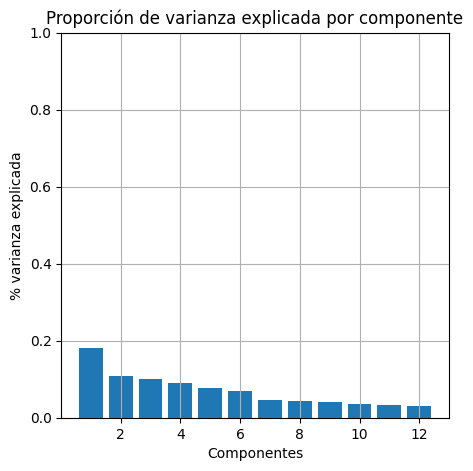

In [ ]:
pipeline.summary_reduccion()

A continuación, almacenamos los modelos empleados en el preprocesamiento de los datos (scaler y PCA) por si fuera necesario utilizarlos en un caso de uso real (explicado al final del notebook):

In [ ]:
pipeline.save_reduccion('preprocess/pca_model.pkl')
pipeline.save_scaler('preprocess/scaler_model.pkl')

Una vez tenemos todos los datos preprocesados, donde se ha estandarizado los datos, así como eliminado las columnas irrelevantes y reducido la dimensionalidad del dataset, procedemos a definir los parámetros que se utilizará para entrenar el modelo.

Para ello se utiliza el método `GridSearchCV` (implementado más arriba en el método `Pipeline`), que consiste en evaluar la mejor combinación de parámetros para el modelo escogido en cada caso, entrenando un modelo para una combinación de parámetros específica, hasta encontrar aquella combinación que nos ofrece mejor rendimiento. Todo esto se lleva a cabo mediante la técnica de Validación Cruzada, que consiste en dividir el conjunto de datos en K pliegues, entrenando el modelo con los K-1 pliegues, y luego evaluándolo con el pliegue K-ésimo, así para cada uno de los pliegues. Al final del entrenamiento se promedia el rendimiento del modelo en cada uno de los pliegues y se obtiene las métricas de validación finales para el modelo.

Con todos los datos listos, procedemos a entrenar los diferentes modelos y comparar el rendimiento de cada uno.

<font color="#D46A31"><h2 align="left">Regresión Logística</h1></font>

Para el primer modelo, entrenamos una Regresión Logística, uno de los modelos más sencillos y simples que hay, más adelante compararemos los resultados con otros modelos de machine learning algo más complejos:

In [ ]:
param_grid={"C":np.logspace(-3,3,7),
            "penalty":["l1","l2",'elasticnet'],
            'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
pprint(param_grid)

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['lbfgs',
            'liblinear',
            'newton-cg',
            'newton-cholesky',
            'sag',
            'saga']}


In [ ]:
pipeline.clasification(LogisticRegression(), param_grid= param_grid, kfold=5, n_jobs= -1)  # n_jobs = -1 para usar todos los procesadores
pipeline.train_clasification()

Una vez ha finalizado el entrenamiento, guardamos el modelo para poder utilizarlo siempre que queramos, así no hay que entrenarlo cada vez que se quiera usar.

In [ ]:
if not os.path.exists('modelos'):
    os.makedirs('modelos')

pipeline.save_model('modelos/lr.pkl')

Observamos a continuación las métricas del modelo entrenado:

In [ ]:
predicciones = pipeline.predict()
pipeline.get_metrics(predicciones)

-------------- Best model parameters -------------- 
 {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'} 

 ------------ Model score in test split ------------ 
 0.848


-------------- Classification report -------------- 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.88      0.87     11001
              satisfied       0.84      0.81      0.82      8423

               accuracy                           0.85     19424
              macro avg       0.85      0.84      0.84     19424
           weighted avg       0.85      0.85      0.85     19424



------------------ Confusion matrix ---------------- 
 Predicción               neutral or dissatisfied  satisfied    All
Real                                                              
neutral or dissatisfied                     9657       1344  11001
satisfied                                   1613       6810   8423
All                                        11270       8154  19

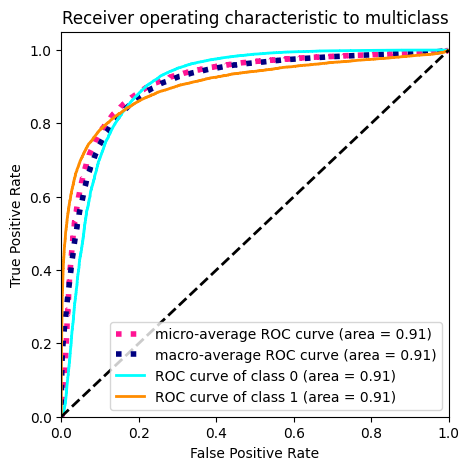

In [ ]:
pipeline.summary_training()

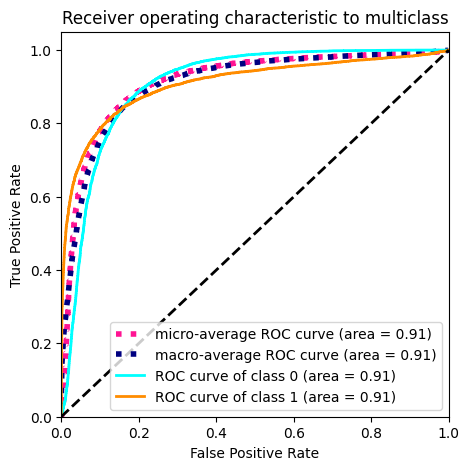

In [ ]:
pipeline.summary_test()

Observamos tanto en entrenamiento como en test un buen desempeño del modelo para cada una de las dos clases de nuestra variable objetivo.

Seguimos probando nuevos modelos para ver si se puede mejorar el resultado obtenido.

<font color="#D46A31"><h2 align="left">Decision Tree</h1></font>

Probamos ahora un modelo de árboles más sencillo, en este caso un árbol de decisión:

In [ ]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 5, 10, 20, 50, 100],
    'min_samples_split' : [2, 5, 10, 20, 50, 100],
    'min_samples_leaf' : [1, 2, 5, 10, 20, 50, 100]
    }

pprint(param_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [None, 5, 10, 20, 50, 100],
 'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100],
 'min_samples_split': [2, 5, 10, 20, 50, 100]}


Entrenamos:

In [ ]:
pipeline.clasification(DecisionTreeClassifier(), param_grid = param_grid, kfold=5, n_jobs= -1)
pipeline.train_clasification()

Guardamos el modelo:

In [ ]:
pipeline.save_model('modelos/dt.pkl')

Observamos las métricas obtenidas:

In [ ]:
predicciones = pipeline.predict()
pipeline.get_metrics(predicciones)

-------------- Best model parameters -------------- 
 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 20, 'min_samples_split': 50} 

 ------------ Model score in test split ------------ 
 0.885


-------------- Classification report -------------- 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.92      0.90     11001
              satisfied       0.89      0.84      0.86      8423

               accuracy                           0.89     19424
              macro avg       0.89      0.88      0.88     19424
           weighted avg       0.89      0.89      0.88     19424



------------------ Confusion matrix ---------------- 
 Predicción               neutral or dissatisfied  satisfied    All
Real                                                              
neutral or dissatisfied                    10101        900  11001
satisfied                                   1333       7090   8423
All                  

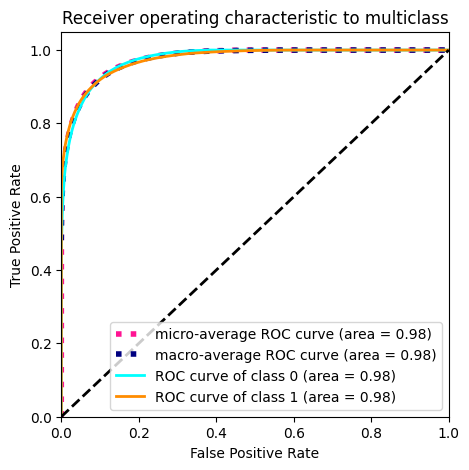

In [ ]:
pipeline.summary_training()

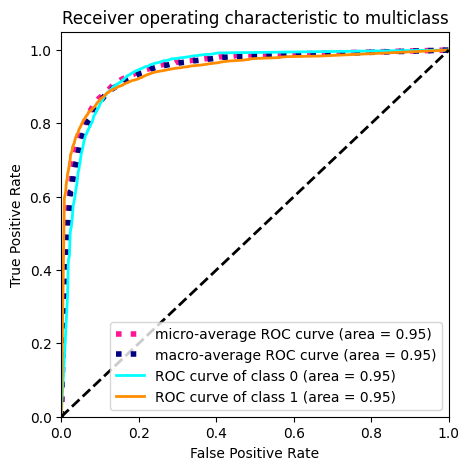

In [ ]:
pipeline.summary_test()

<font color="#D46A31"><h2 align="left">Random Forest</h1></font>

Entrenamos ahora otro modelo de árboles, en este caso un Random Forest, para ver si puede igualar o superar a los modelos vistos hasta el momento:

In [ ]:
# Número de árboles en el bosque
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]

# Número de features a considerar en cada split
max_features = ['auto', 'sqrt', 'log2']

# Número máximo de niveles en cada árbol
max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]

# Número mínimo de muestras requeridas para hacer split en un nodo
min_samples_split = [2, 5, 10]

# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4]

# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]
# --------------------------------------------------------------------------------------
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}


Entrenamos:

In [ ]:
pipeline.clasification(RandomForestClassifier(), param_grid= param_grid, kfold=5, n_jobs= -1)
pipeline.train_clasification()

Guardamos el modelo.

In [ ]:
pipeline.save_model('modelos/rf.pkl', )

Observamos las métricas obtenidas:

In [ ]:
predicciones = pipeline.predict()
pipeline.get_metrics(predicciones)

-------------- Best model parameters -------------- 
 {'bootstrap': False, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800} 

 ------------ Model score in test split ------------ 
 0.92


-------------- Classification report -------------- 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.95      0.93     11001
              satisfied       0.93      0.88      0.90      8423

               accuracy                           0.92     19424
              macro avg       0.92      0.92      0.92     19424
           weighted avg       0.92      0.92      0.92     19424



------------------ Confusion matrix ---------------- 
 Predicción               neutral or dissatisfied  satisfied    All
Real                                                              
neutral or dissatisfied                    10460        541  11001
satisfied                                   101

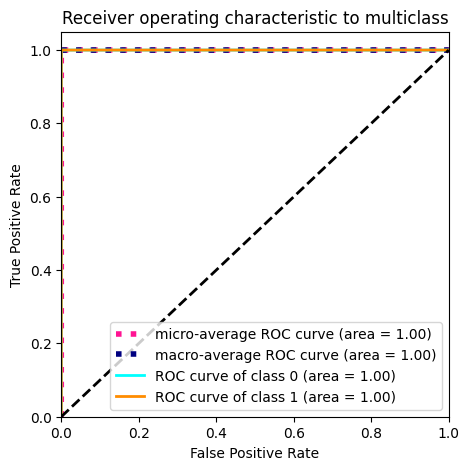

In [ ]:
pipeline.summary_training()

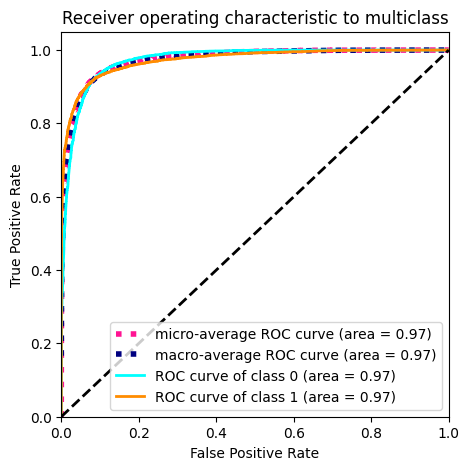

In [ ]:
pipeline.summary_test()

<font color="#D46A31"><h2 align="left">Multi-layer Perceptron (MLP)</h1></font>

Continuamos entrenando un modelo que no pertenece tanto a la familia del aprendizaje máquina, sino del aprendizaje profundo, estamos hablando de una red neuronal, en este caso un perceptrón multicapa. Estos modelos proporcionan en términos generales resultados muy buenos para problemas de clasificación, así que vamos a ver cómo rinde:

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

pprint(param_grid)

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40), (100, 50, 30)],
 'learning_rate': ['constant', 'adaptive'],
 'max_iter': [50, 100, 150],
 'solver': ['sgd', 'adam']}


Entrenamos:

In [ ]:
pipeline.clasification(MLPClassifier(), param_grid = param_grid, kfold=5, n_jobs= -1)
pipeline.train_clasification()

Guardamos el modelo:

In [ ]:
pipeline.save_model('modelos/mlp.pkl')

Observamos las métricas obtenidas:

In [ ]:
predicciones = pipeline.predict()
pipeline.get_metrics(predicciones)

-------------- Best model parameters -------------- 
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'} 

 ------------ Model score in test split ------------ 
 0.94


-------------- Classification report -------------- 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.96      0.95     11001
              satisfied       0.95      0.91      0.93      8423

               accuracy                           0.94     19424
              macro avg       0.94      0.94      0.94     19424
           weighted avg       0.94      0.94      0.94     19424



------------------ Confusion matrix ---------------- 
 Predicción               neutral or dissatisfied  satisfied    All
Real                                                              
neutral or dissatisfied                    10576        425  11001
satisfied                            

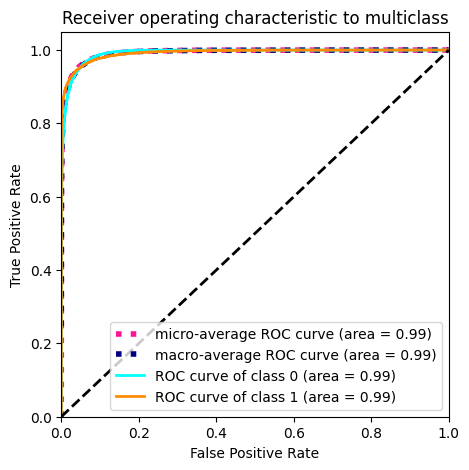

In [ ]:
pipeline.summary_training()

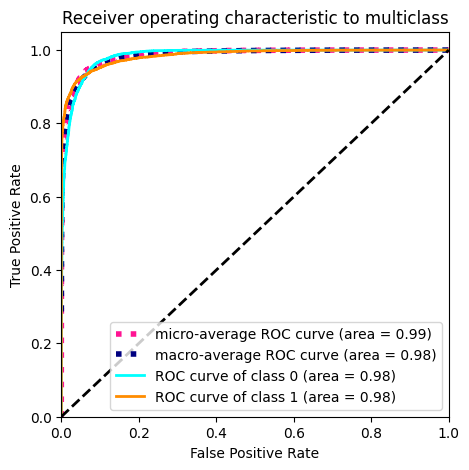

In [ ]:
pipeline.summary_test()

<font color="#D46A31"><h2 align="left">Resultados y conclusiones</h1></font>

En primera instancia, se ha entrenado un modelo lineal, en este caso una Regresión Logística. Las métricas en sí eran unas buenas métricas, ya que el modelo estaba sacando un score de casi 0.85 en test, lo cual está bastante bien. Pero todavía quedaba por ver si se podía mejora.

Del modelo lineal, hemos pasado a la familia de los modelos de tipo árbol, en primer lugar un árbol de decisión. El rendimiento ha sido mejor que la regresión logística, pero aún se puede mejorar, por lo que seguimos probando con más modelos de árboles.

El siguiente en la lista ha sido un random forest, el cual ha mejorado mucho la precisión de los modelos vistos hasta ahora, llegando a un score de 0.92 y unas métricas de precision y recall muy buenos. Vamos a probar con otro modelo para ver si se puede mejorar más si cabe.

Finalmente, se ha entrenado una red neuronal sencilla, un perceptrón multicapa. El rendimiento del Perceptrón Multicapa ha superado con creces la Regresión Logística y el Árbol de Decisión, sacando un score en test de 0.94, unos valores de precisión, recall y f1 muy buenos, así como un AUC en test y una proporción de verdaderos positivos y verdaderos negativos en la matriz de confusión prácticamente excelentes, dando en general un rendimiento superior a los dos primeros modelos. Por otra parte, el random forest es el que más cerca ha estado de alcanzar al perceptrón multicapa, pero aún así no ha conseguido igualarlo/superarlo, por lo que:

__MODELO FINAL ESCOGIDO:__ Perceptrón Multicapa

<font color="#D46A31"><h2 align="left">Obtención de predicciones a partir de los modelos entrenados</h1></font>

En caso de querer hacer inferencia a partir de los modelos previamente entrenados, se proporciona el siguiente código que devuelve las predicciones correspondientes para el modelo escogido, por lo que **NO ES NECESARIO EJECUTAR NADA DE LO ANTERIOR** (a excepción de las celdas de la carga de librerías al principio del notebook). Para ello es necesario disponer del archivo `.pkl` que contiene el modelo entrenado, así como de los modelos de estandarización y reducción de la dimensionalidad entrenados, ya que los datos sobre los que vayamos a inferir deben pasar las mismas fases de preprocesamiento que los datos con los que se han entrenado los diferentes modelos para un correcto funcionamiento de los mismos. En caso de no disponer de dichos archivos, sí que sería necesario entrenar tanto los modelos de estandarización y reducción de dimensionalidad, así como el modelo predictivo en sí para poder realizar la inferencia.

En primer lugar, es necesario cargar los datos con los que se va a trabajar, y posteriormente instanciar el objeto `Pipeline` de nuevo para almacenar y preprocesar los datos.

Para ello, supongamos que estamos en la situación de una compañía aérea que va a utilizar dichos modelos para poder predecir si los clientes estarán o no satisfechos con el vuelo. Es por ello que suponemos un caso imaginario en el que se han extraído datos de los vuelos que van a tomar 15 clientes a diferentes destinos. Al ser datos sobre los que se quiere inferir, no disponemos de la variable objetivo, ya que son casos hipotéticos sobre los que se quiere aplicar el modelo entrenado para saber si estarían satisfechos con el vuelo o no. Aquí los datos de los que se dispone:

In [ ]:
data_vuelos_inferencia = pd.read_csv('data/datos_clientes.csv', index_col=0)
data_vuelos_inferencia.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
113978,10074,35305,Female,Loyal Customer,59,Business travel,Eco,1035,4,2,...,4,4,4,4,4,1,4,5,0,0.0
67378,67378,74697,Female,Loyal Customer,19,Personal Travel,Eco,1171,3,5,...,3,4,3,5,5,5,4,4,40,10.0
104291,387,60943,Male,Loyal Customer,13,Business travel,Business,1529,5,5,...,4,4,4,4,5,3,5,4,0,0.0
28936,28936,116858,Female,disloyal Customer,37,Business travel,Business,370,2,2,...,5,5,4,4,5,3,4,5,111,102.0
57365,57365,46944,Male,Loyal Customer,23,Personal Travel,Eco,666,2,5,...,1,3,1,5,3,4,4,3,0,0.0


A continuación, instanciamos el objeto `Pipeline` y preprocesamos los datos para poder realizar la inferencia. Para ello llamamos al método `predict_from_pretrained`, que ya se encarga de hacer el preprocesamiento, así como la inferencia, devolviendo las predicciones directamente.

In [ ]:
model_path = 'modelos/mlp.pkl' # modelo entrenado con MLP
scaler_path = 'preprocess/scaler_model.pkl' # scaler entrenado
reduccion_path = 'preprocess/pca_model.pkl' # modelo de reducción de la dimensionalidad entrenado

pipeline = Pipeline()
_, predicciones = pipeline.predict_from_pretrained(data_vuelos_inferencia, model_path, scaler_path, reduccion_path)

Finalmente juntamos las predicciones con los id's de los respectivos clientes para ver los resultados de manera más clara:

In [ ]:
pred_clientes = np.concatenate((data_vuelos_inferencia['id'].values.reshape(-1,1), np.array(predicciones).reshape(-1,1)), axis=1)
pred_clientes = pd.DataFrame(pred_clientes, columns=['id', 'satisfaction'])
pred_clientes

,id,satisfaction
0,35305,satisfied
1,74697,neutral or dissatisfied
2,60943,satisfied
3,116858,neutral or dissatisfied
4,46944,neutral or dissatisfied
5,87979,satisfied
6,42666,satisfied
7,6744,satisfied
8,111232,neutral or dissatisfied
9,112732,neutral or dissatisfied


Estos resultados pueden ayudar a la compañía aérea a tomar decisiones sobre qué poder mejorar en los diferentes aspectos que se tratan en el dataset con tal de maximizar aquellos clientes que no están del todo satisfechos con su experiencia con el vuelo.